<a href="https://colab.research.google.com/github/alhajimoha/Tanzania-Tourism-EDA-and-Modelling/blob/main/Exploratory_data_analysis_and_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Description

The Tanzanian tourism sector plays a significant role in the Tanzanian economy, contributing about 17% to the country’s GDP and 25% of all foreign exchange revenues. The sector, which provides direct employment for more than 600,000 people and up to 2 million people indirectly, generated approximately $2.4 billion in 2018 according to government statistics. Tanzania received a record 1.1 million international visitor arrivals in 2014, mostly from Europe, the US and Africa.

Tanzania is the only country in the world which has allocated more than 25% of its total area for wildlife, national parks, and protected areas.There are 16 national parks in Tanzania, 28 game reserves, 44 game-controlled areas, two marine parks and one conservation area.

Tanzania’s tourist attractions include the Serengeti plains, which hosts the largest terrestrial mammal migration in the world; the Ngorongoro Crater, the world’s largest intact volcanic caldera and home to the highest density of big game in Africa; Kilimanjaro, Africa’s highest mountain; and the Mafia Island marine park; among many others. The scenery, topography, rich culture and very friendly people provide for excellent cultural tourism, beach holidays, honeymooning, game hunting, historical and archaeological ventures – and certainly the best wildlife photography safaris in the world.

I did an exploratory data analysis and modelling to get sense of the data


In [1]:
#importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
test = pd.read_csv("Test.csv")
train = pd.read_csv("Train.csv")


In [3]:
#showing the first five rows of our dataset
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


## Data Cleaning

*   Checking for missing values
*   Checking for inconsitent values
*   Checking for duplicate values
*   Encoding categorical features for machine learning algorithm






In [4]:
train.isnull().sum()

,0
ID,0
country,0
age_group,0
travel_with,1114
total_female,3
total_male,5
purpose,0
main_activity,0
info_source,0
tour_arrangement,0


In [5]:
#Handling missing values
train['travel_with'].fillna('Undisclosed', inplace=True)
train['most_impressing'].fillna('none', inplace=True)

train['total_female'].fillna(train['total_female'].median(), inplace=True)
train['total_male'].fillna(train['total_male'].median(), inplace=True)

In [6]:
#Cross checking for null value
train.isnull().sum()

,0
ID,0
country,0
age_group,0
travel_with,0
total_female,0
total_male,0
purpose,0
main_activity,0
info_source,0
tour_arrangement,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            4809 non-null   object 
 4   total_female           4809 non-null   float64
 5   total_male             4809 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [8]:
#checking for duplicated records
train.duplicated().sum()

0

In [9]:
#checking for negative value in our target value
(train['total_cost'] < 0).sum()

0

In [10]:
from sklearn.preprocessing import LabelEncoder

#Encoding our categorical features

#list of column to one-hot encode
one_hot_col = ['country', 'travel_with', 'purpose', 'main_activity', 'info_source',
                   'tour_arrangement', 'payment_mode', 'most_impressing']


#list of columns to label encode
label_col = ['age_group']

#one hot encoding
train_one_hot = pd.get_dummies(train[one_hot_col], drop_first=True)
train_one_hot.head()

#label encoding
label_encoder = LabelEncoder()
train_label = train[label_col].apply(label_encoder.fit_transform)

#drop original column from the dataset
train.drop(one_hot_col + label_col, axis=1, inplace=True)
train_encoded = pd.concat([train, train_one_hot, train_label], axis=1)
train_encoded.head()



,ID,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,total_cost,country_ANGOLA,country_ARGENTINA,country_AUSTRALIA,country_AUSTRIA,country_BELGIUM,country_BERMUDA,country_BRAZIL,country_BURGARIA,country_BURUNDI,country_CANADA,country_CAPE VERDE,country_CHILE,country_CHINA,country_COLOMBIA,country_COMORO,country_CONGO,country_COSTARICA,country_CROATIA,country_CYPRUS,country_CZECH REPUBLIC,country_DENMARK,country_DJIBOUT,country_DOMINICA,country_DRC,country_EGYPT,country_ESTONIA,country_ETHIOPIA,country_FINLAND,country_FRANCE,country_GEORGIA,country_GERMANY,country_GHANA,country_GREECE,country_HUNGARY,country_INDIA,country_INDONESIA,country_IRAN,country_IRAQ,country_IRELAND,country_ISRAEL,country_ITALY,country_IVORY COAST,country_JAPAN,country_KENYA,country_KOREA,country_KUWAIT,country_LATVIA,country_LEBANON,country_LESOTHO,country_LITHUANIA,country_LUXEMBOURG,country_MADAGASCAR,country_MALAWI,country_MALAYSIA,country_MALT,country_MAURITIUS,country_MEXICO,country_MONTENEGRO,country_MORROCO,country_MOZAMBIQUE,country_MYANMAR,country_NAMIBIA,country_NEPAL,country_NETHERLANDS,country_NEW ZEALAND,country_NIGER,country_NIGERIA,country_NORWAY,country_OMAN,country_PAKISTAN,country_PHILIPINES,country_POLAND,country_PORTUGAL,country_QATAR,country_ROMANIA,country_RUSSIA,country_RWANDA,country_SCOTLAND,country_SERBIA,country_SINGAPORE,country_SLOVAKIA,country_SLOVENIA,country_SOUTH AFRICA,country_SPAIN,country_SRI LANKA,country_SUDAN,country_SWAZILAND,country_SWEDEN,country_SWIZERLAND,country_TAIWAN,country_THAILAND,country_TRINIDAD TOBACCO,country_TUNISIA,country_TURKEY,country_UAE,country_UGANDA,country_UKRAIN,country_UNITED ARAB EMIRATES,country_UNITED KINGDOM,country_UNITED STATES OF AMERICA,country_URUGUAY,country_YEMEN,country_ZAMBIA,country_ZIMBABWE,travel_with_Children,travel_with_Friends/Relatives,travel_with_Spouse,travel_with_Spouse and Children,travel_with_Undisclosed,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,"info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,tour_arrangement_Package Tour,payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",most_impressing_none,age_group
0,tour_0,1.0,1.0,No,No,No,No,No,No,No,13.0,0.0,No,674602.5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,2
1,tour_10,1.0,0.0,No,No,No,No,No,No,No,14.

In [11]:
#compute summary statistics for numerical columns
train_encoded.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost,age_group
count,4809.000000,4809.000000,4809.000000,4809.000000,4.809000e+03,4809.000000
mean,0.926804,1.009565,8.488043,2.304429,8.114389e+06,1.287170
std,1.287841,1.138273,10.427624,4.227080,1.222490e+07,0.769426
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04,0.000000
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05,1.000000
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06,1.000000
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06,2.000000
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07,3.000000


# Observation form our summary statistics

- `total_female` and `total_male` most values are around 1, but there is an outlier in both features which is 49 and 44 respectively.
- Solution: We will use robust scaling and outlier capping technique to deal with the outlier.

- `night_mainland` and `night_zanzibar` most tourist spent 8 nights at the mainland and 2 nights at zanzibar. However, some spent way more nights, 145 and 61 nights respectively.
- Solution: We will use robust scaling and outlier capping technique to deal with the outlier.

- `total Cost` data is likely to be skewed, i'll apply log transformation to this feature

In [12]:
#apply robust scaling by capping the outliers to the 1st and 99th percentile for total_male and total_female
percentile_1 = train_encoded['total_female'].quantile(0.01)
percentile_99 = train_encoded['total_female'].quantile(0.99)
train_encoded['total_female'] = np.clip(train_encoded['total_female'], percentile_1, percentile_99)


percentile_1 = train_encoded['total_male'].quantile(0.01)
percentile_99 = train_encoded['total_male'].quantile(0.99)
train_encoded['total_male'] = np.clip(train_encoded['total_male'], percentile_1, percentile_99)

percentile_1 = train_encoded['night_mainland'].quantile(0.01)
percentile_99 = train_encoded['night_mainland'].quantile(0.99)
train_encoded['night_mainland'] = np.clip(train_encoded['night_mainland'], percentile_1, percentile_99)

percentile_1 = train_encoded['night_zanzibar'].quantile(0.01)
percentile_99 = train_encoded['night_zanzibar'].quantile(0.99)
train_encoded['night_zanzibar'] = np.clip(train_encoded['night_zanzibar'], percentile_1, percentile_99)

#appplying log transformation to total cost to handle skewed distribution
train_encoded['total_cost_log'] = np.log1p(train_encoded['total_cost'])

#show summary statistics to confrim
train_encoded.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost,age_group,total_cost_log
count,4809.000000,4809.000000,4809.000000,4809.000000,4.809000e+03,4809.000000,4809.000000
mean,0.892701,0.976294,8.345810,2.189229,8.114389e+06,1.287170,14.826733
std,0.925988,0.785859,9.424407,3.493570,1.222490e+07,0.769426,1.681619
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04,0.000000,10.799596
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05,1.000000,13.607472
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06,1.000000,15.038661
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06,2.000000,16.112581
max,5.000000,4.000000,59.000000,15.000000,9.953288e+07,3.000000,18.415999


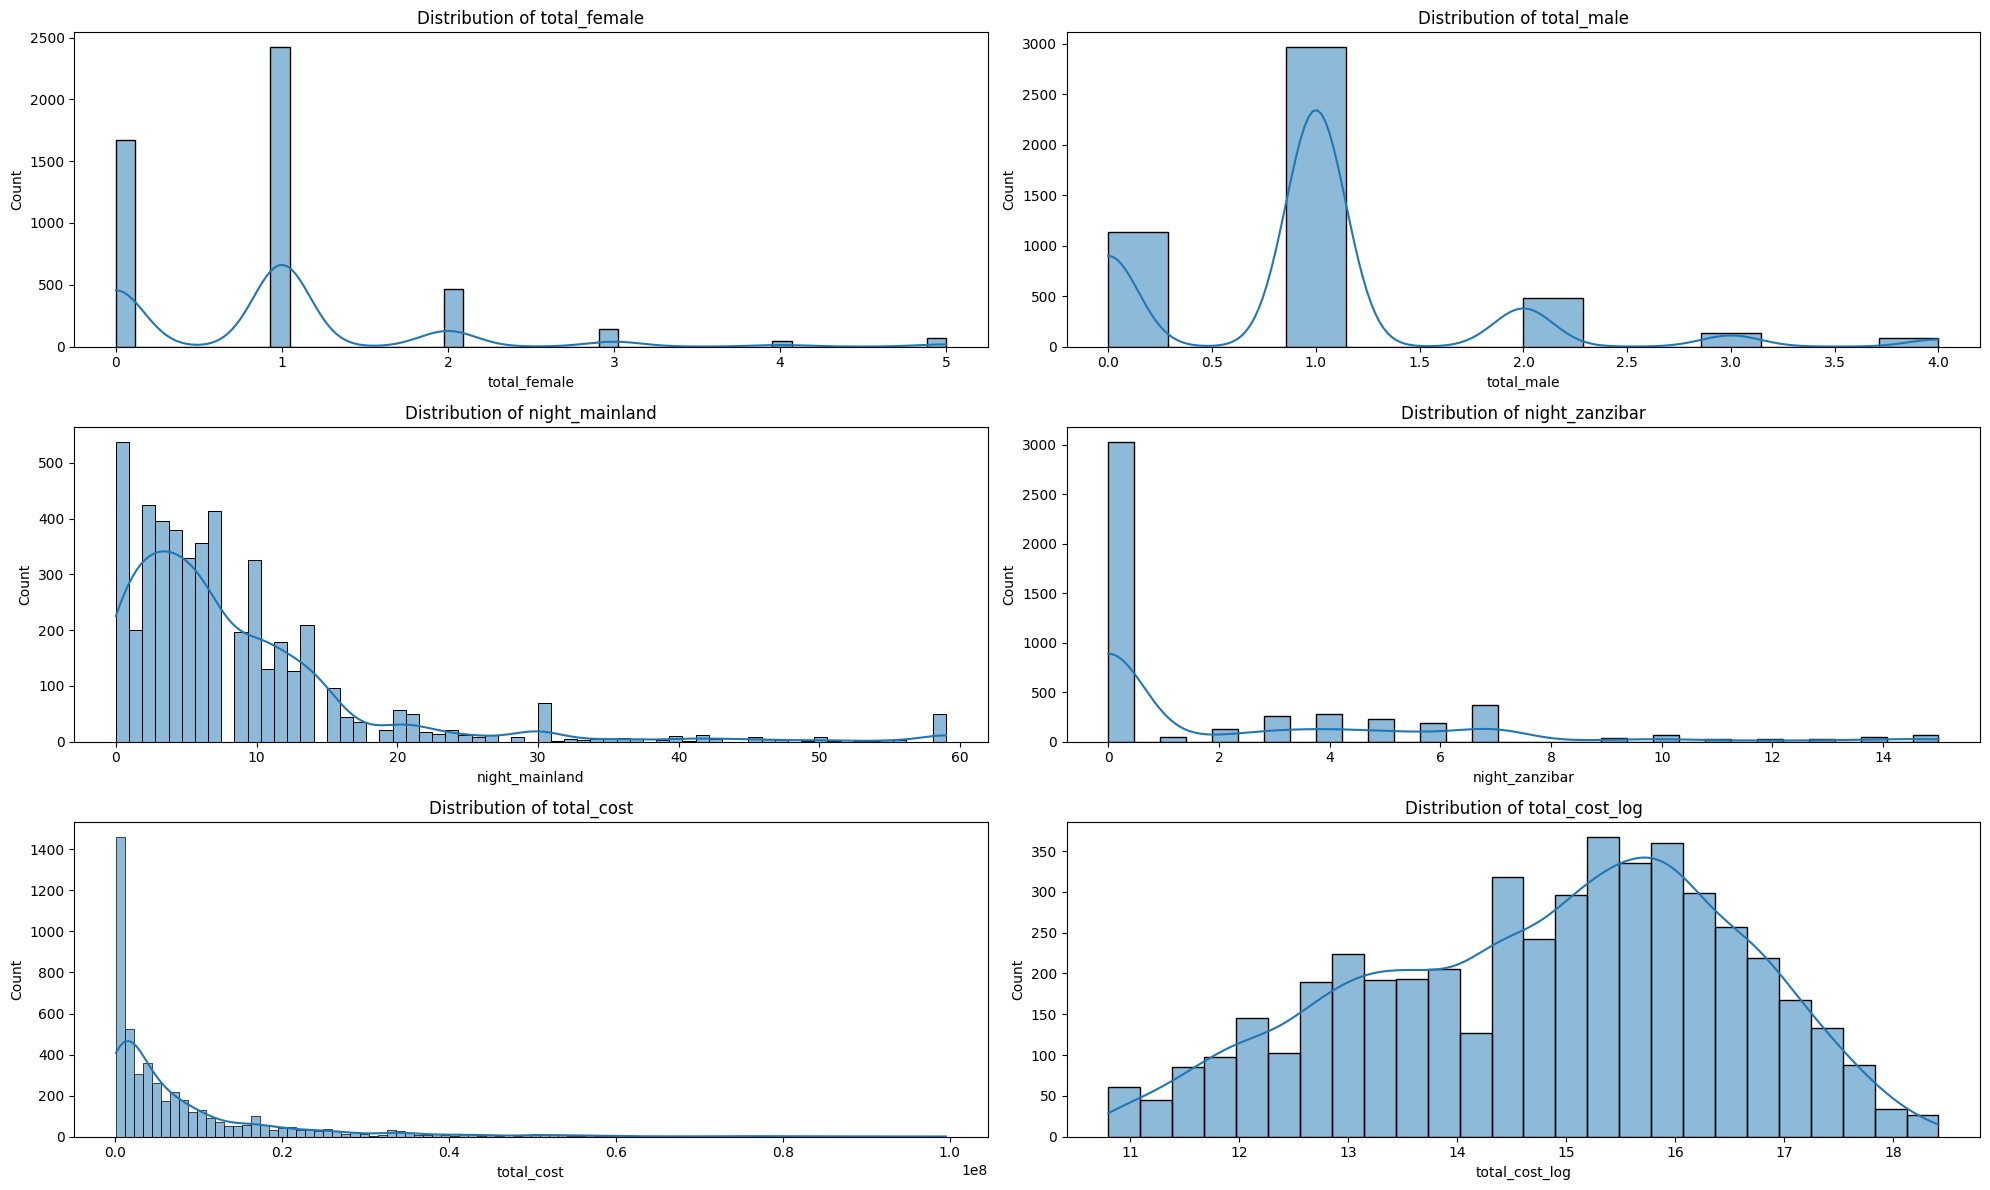

In [13]:
#list of numerical columns
numerical_column = ['total_female', 'total_male', 'night_mainland', 'night_zanzibar', 'total_cost']

#initialize the matplotlib figure
plt.figure(figsize=(20, 12))

#loop through each numerical column and create plots
for i, column in enumerate(numerical_column, 1):
    plt.subplot(3, 2, i)
    sns.histplot(train_encoded[column], kde=True)
    plt.title(f'Distribution of {column}')

#add sub_plot for the transform total_cost_log
plt.subplot(3, 2, 6)
sns.histplot(train_encoded['total_cost_log'], kde=True)

plt.title('Distribution of total_cost_log')

#adjust the layout and display the plots
plt.tight_layout()
plt.show()

In [14]:
#Checking non-numeric column in the dataframe
non_numeric_cols = train_encoded.select_dtypes(include=['object']).columns

# Display the column names and the first few rows of the non-numeric columns
print("Non-numeric columns:", non_numeric_cols)
display(train_encoded[non_numeric_cols].head())

Non-numeric columns: Index(['ID', 'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'first_trip_tz'],
      dtype='object')


,ID,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,first_trip_tz
0,tour_0,No,No,No,No,No,No,No,No
1,tour_10,No,No,No,No,No,No,No,Yes
2,tour_1000,No,No,No,No,No,No,No,No
3,tour_1002,No,Yes,Yes,Yes,Yes,Yes,No,Yes
4,tour_1004,No,No,No,No,No,No,No,Yes


- `ID` column is an identifier that should be dropped.

- `package` likes columns are categorical values that should be converted into numerical values in order to allow machine learning algorithm works on it.


In [15]:
from sklearn.preprocessing import LabelEncoder

#initialize labelEncoder
label_enoder = LabelEncoder()

#Label encode the object type column except ID
for col in non_numeric_cols:
    if col != 'ID':
        # Indent the code within the if block
        train_encoded[col] = label_enoder.fit_transform(train_encoded[col].astype(str))

all(train_encoded.dtypes != 'object') # Added parentheses to !=

False

In [16]:
#checking the data types of the other column
remaining_col = train_encoded.select_dtypes(include='object').columns

remaining_col, train_encoded[remaining_col].head()

(Index(['ID'], dtype='object'),
           ID
 0     tour_0
 1    tour_10
 2  tour_1000
 3  tour_1002
 4  tour_1004)

In [17]:
train_encoded.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64'), dtype('bool')],
      dtype=object)

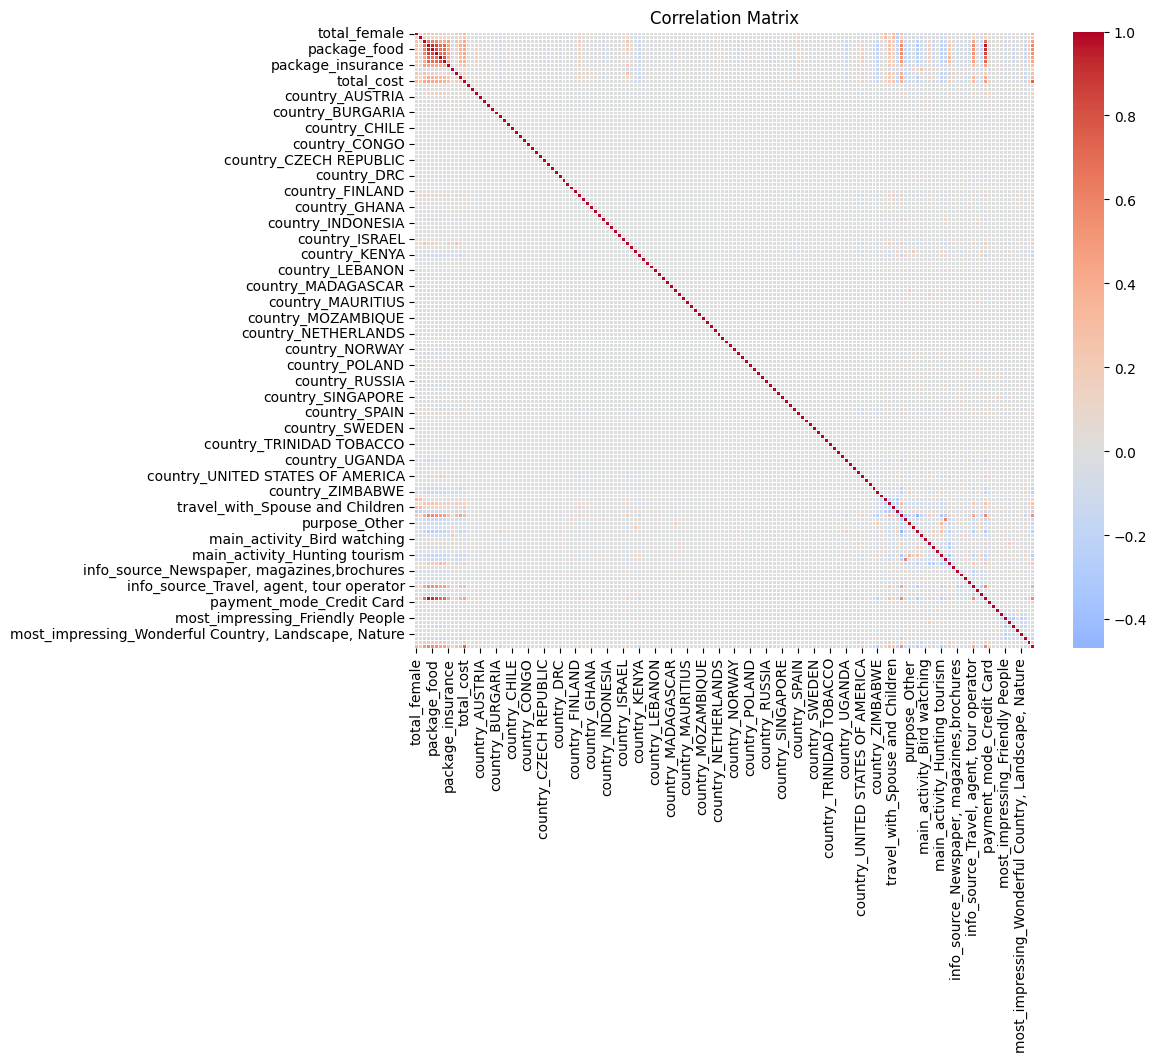

In [18]:
#computing correlation matrix while dropping the ID Column

correlation_matrix = train_encoded.drop('ID', axis=1).corr()

# Create a heatmap of the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center = 0, linewidth=.5)
plt.title('Correlation Matrix')
plt.show()

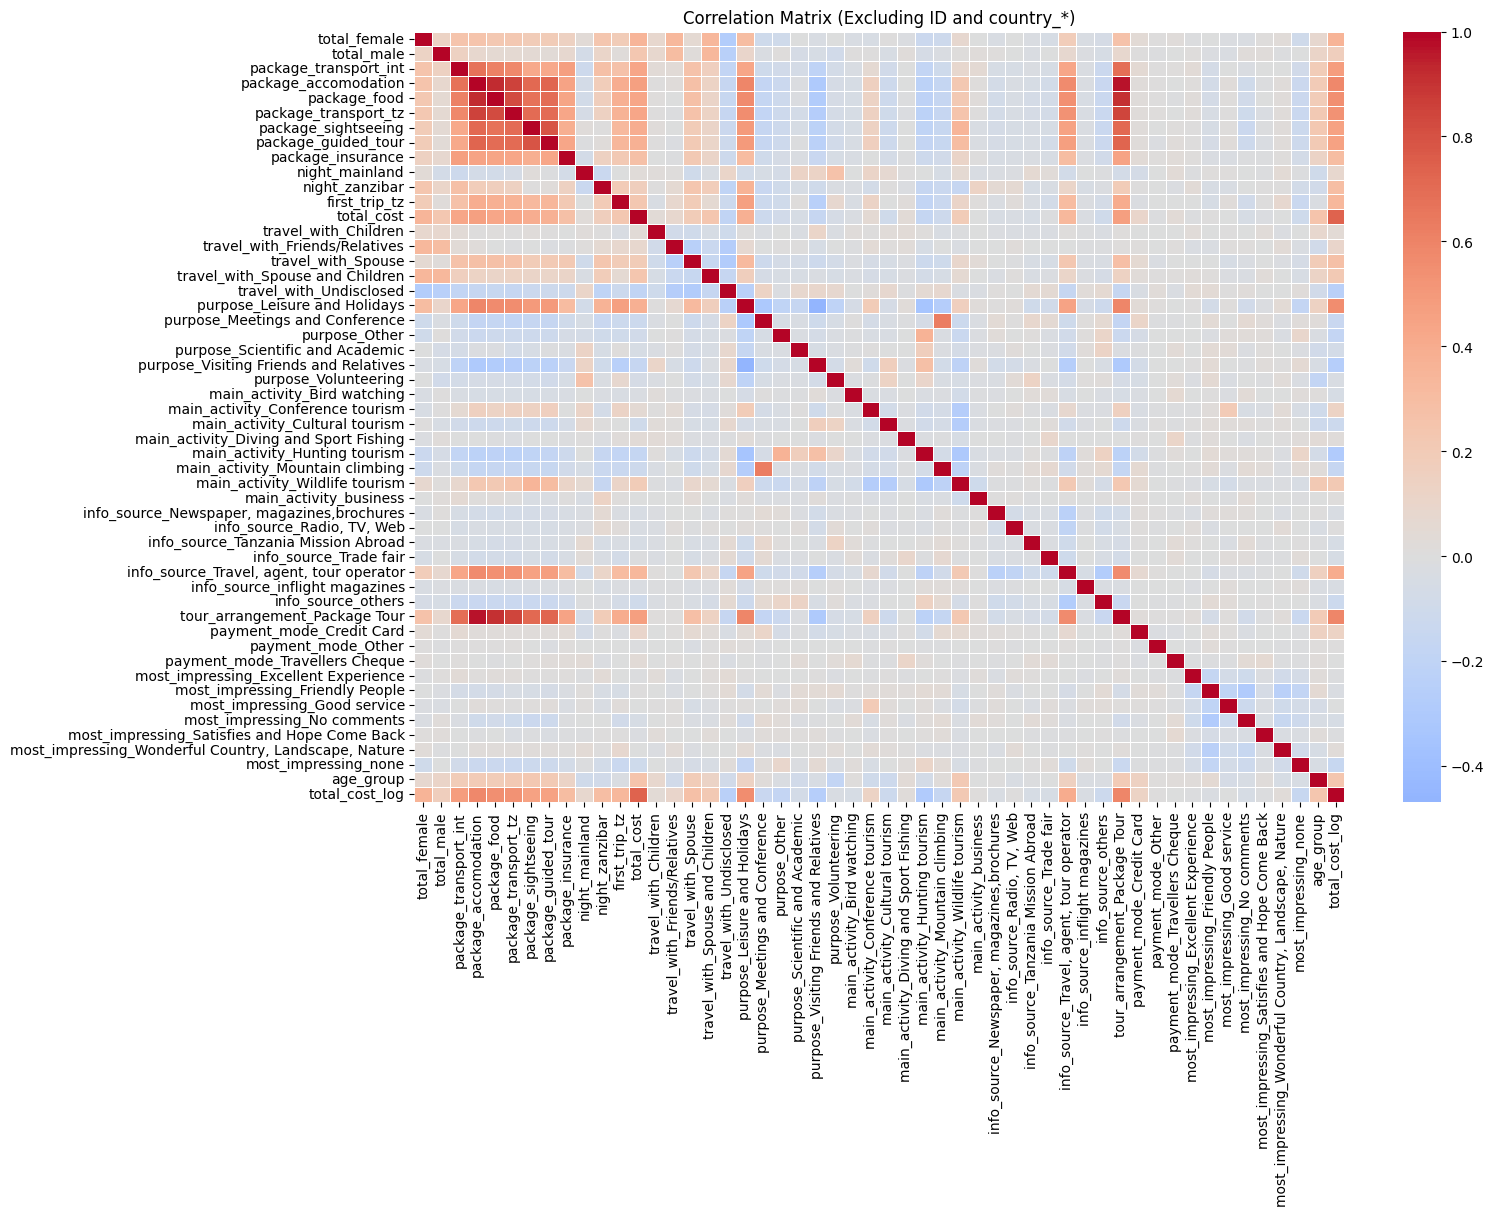

In [19]:
# Drop the 'ID' column and columns that start with "country_"
columns_to_drop = ['ID'] + [col for col in train_encoded.columns if col.startswith('country_')]
correlation_matrix_filtered = train_encoded.drop(columns=columns_to_drop).corr()

# Plot the heatmap for the filtered correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_filtered, cmap='coolwarm', center=0, linewidths=.5)
plt.title("Correlation Matrix (Excluding ID and country_*)")
plt.show()

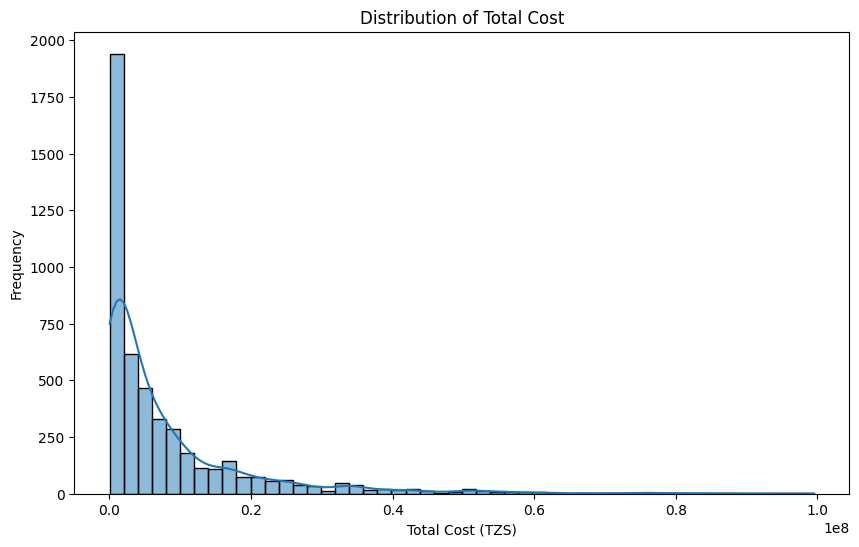

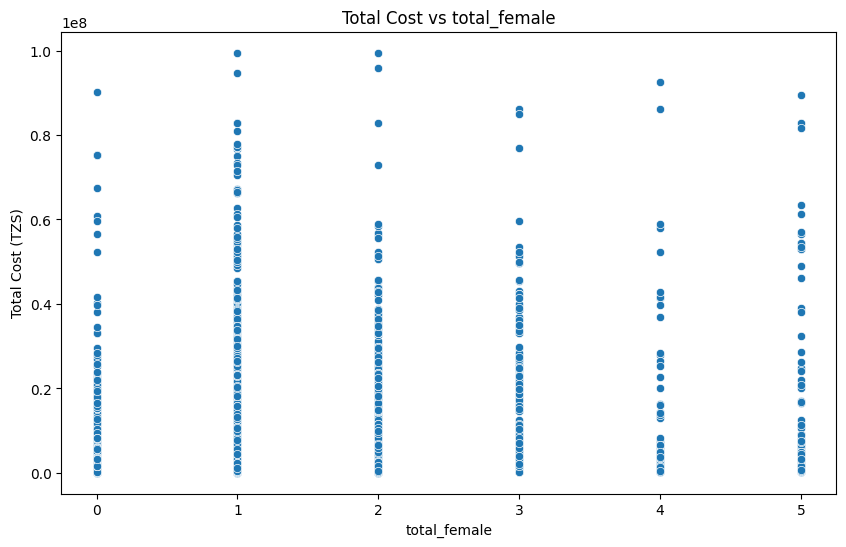

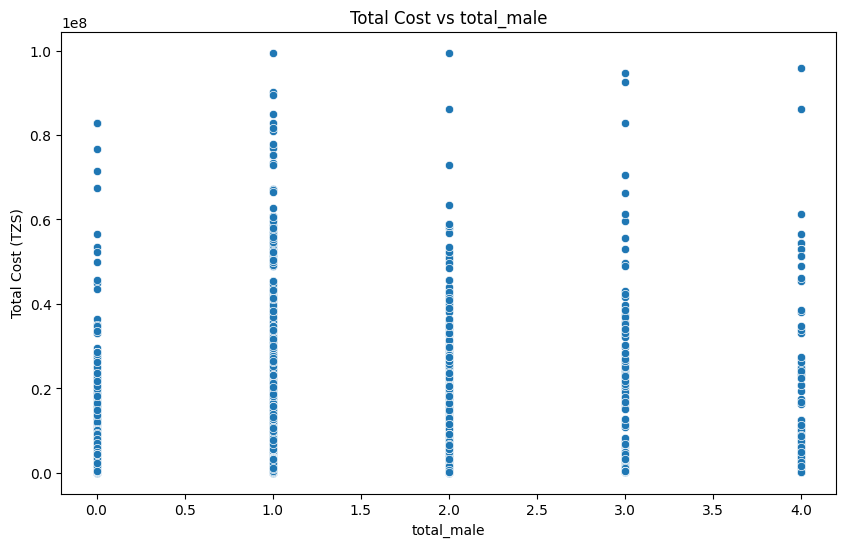

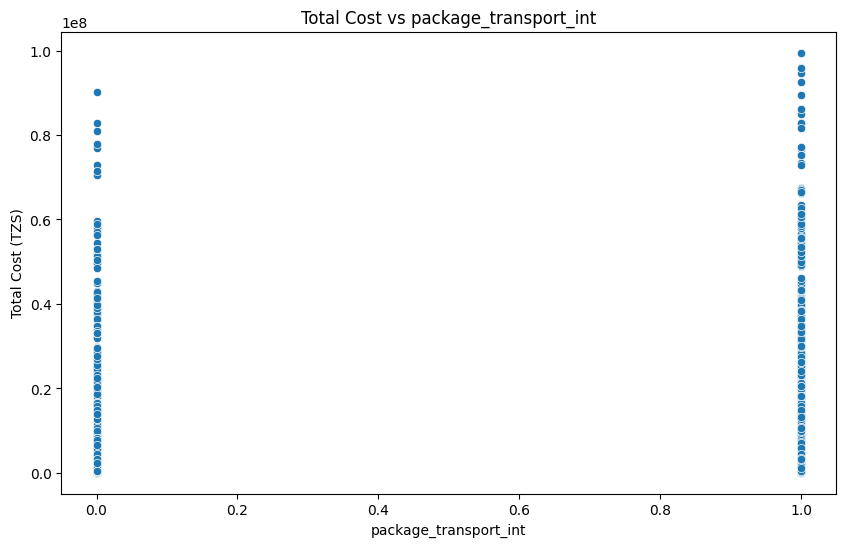

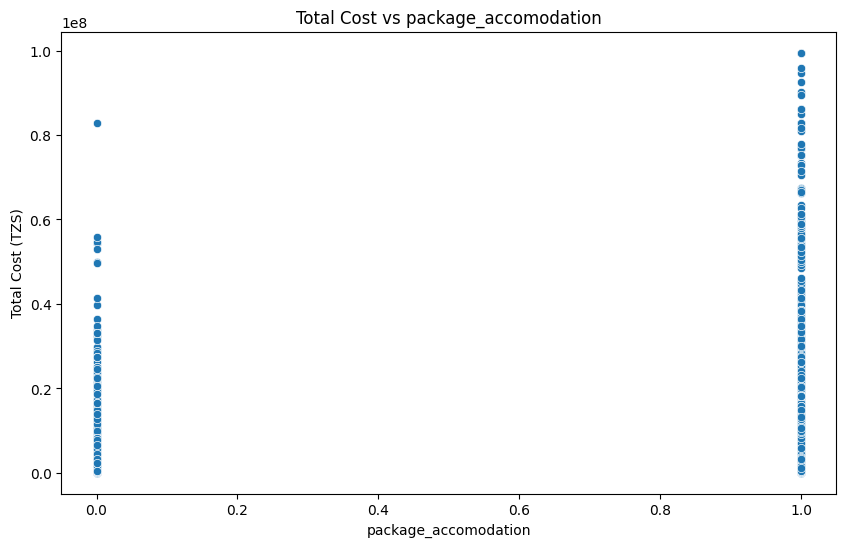

In [20]:
 #Univariate Analysis: Distribution of target variable 'total_cost'
plt.figure(figsize=(10, 6))
sns.histplot(train_encoded['total_cost'], bins=50, kde=True)
plt.title('Distribution of Total Cost')
plt.xlabel('Total Cost (TZS)')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis: Scatter plots for numerical variables against 'total_cost'
numerical_features = train_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove('total_cost')  # Remove the target variable

# Plot scatter plots
for feature in numerical_features[:4]:  # Limiting to first 4 numerical features for demonstration
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='total_cost', data=train_encoded)
    plt.title(f'Total Cost vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Total Cost (TZS)')
    plt.show()


*Univariate Analysis*:

- `Total Cost`: This looks a bit lopsided, leaning more to the right. This might mess with our simple linear models. We could try a trick like a log transformation to make things out.


*Bivariate Aanlysis*
- `Scatter Plots`: When we plot other numbers against total cost, the dots don't line up perfectly. It's not a straight shot. This means our usual linear models might not be the best fit. We should think about using models that can handle these curvy relationships.

---



In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# plit the data into 80% train and 20% test sets
X = train_encoded.drop(columns=['total_cost', 'ID'])  # Excluding the 'ID' and target column for features
y = train_encoded['total_cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = linear_reg_model.predict(X_test)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R^2 Score
r2 = r2_score(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

rmse, r2, mape

(7286064.300077519, 0.6240310522633432, 710.6852970446605)

`RMSE`: Our model's predictions were off by about 7,286,064 TZS on average. To put this in perspective, we need to compare it to the typical total cost.

`R-squared`: Our model explains about 62.4% of the variation in total cost. That's okay, but we can do better.

`MAPE`: This is where things get tricky. Our model's predictions were off by a whopping 710.69% on average! That's a huge miss.

What's the Deal with the Coefficients?

With such high errors, it seems like a simple linear model might not be the best fit for this data. Remember those scatter plots that weren't perfectly straight lines? Yeah, that's a hint. We might need to try a more complex model or find new ways to represent our data to get better results.


In [32]:
#expand row
pd.set_option('display.max_rows', None)

#Extract the coefficient and pair them with their coresponding features
#expand row
pd.set_option('display.max_rows', None)

#Extract the coefficient and pair them with their coresponding features
coefficient = linear_reg_model.coef_
features = X_train.columns
features_coefficient = pd.DataFrame({ 'Coefficient': coefficient}, index=features) #index was not defined, corrected it here.
features_coefficient

,Coefficient
total_female,1.405697e+06
total_male,1.648346e+06
package_transport_int,2.410033e+06
package_accomodation,-8.188308e+04
package_food,7.103741e+05
package_transport_tz,1.079395e+06
package_sightseeing,1.025426e+06
package_guided_tour,-2.506211e+04
package_insurance,9.525100e+05
night_mainland,-1.172584e+04


##Key Takeaways from Our Model

Positive Coefficients(Big Spenders): Tourists from Nigeria, Uruguay, and Bermuda seem to have deep pockets. Our model shows they tend to spend more. This is great news for targeting marketing campaigns and crafting premium tour packages.

Negative Coefficients (Budget Travelers): Visitors from Georgia, Ivory Coast, and Argentina might be more budget-conscious. Our model suggests they're likely to spend less.

Payment Preferences: When tourists pay with the 'Other' method, it's usually a sign of lower spending.

Magnitude: The coefficients vary widely in magnitude, reflecting varying degrees of influence on tourist spending. This is crucial for understanding which features are most impactful.

<Figure size 1200x800 with 0 Axes>

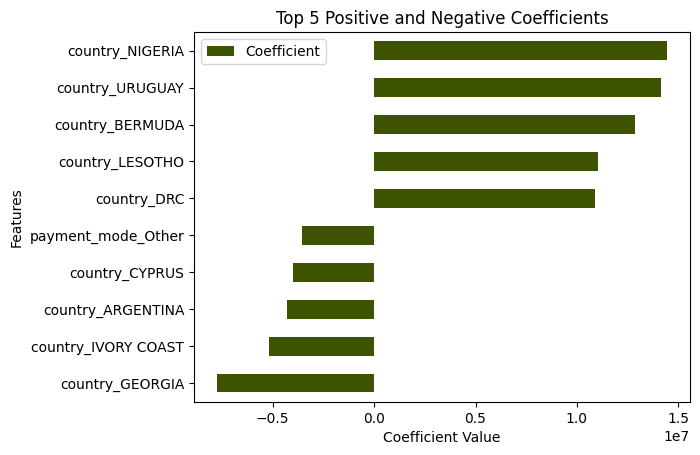

In [33]:
# sort the coefficients for better visualization
sorted_feature_coefficient = features_coefficient.sort_values(by=['Coefficient'])

#selecting the top 5 and bottom 5
top_5 = sorted_feature_coefficient.head(5)
bottom_5 = sorted_feature_coefficient.tail(5)

#combining both to create a single plot

combined_features = pd.concat([top_5, bottom_5])
# Create the plot
plt.figure(figsize=(12, 8))
combined_features.plot(kind='barh', color='#3D5300')
plt.title('Top 5 Positive and Negative Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()


Conclusion

Root Mean Square Error (RMSE): The RMSE value is approximately 7,286,064.3 TZS (Tanzanian Shilling). This metric provides an idea of the magnitude of the errors the model makes. Given that the target variable is the total cost of the trip, this RMSE value needs to be interpreted in the context of the typical spending amounts in the dataset to evaluate if this error is acceptable.


R-squared: The R² value is approximately 0.624, indicating that around 62.4% of the variability in the total cost is explained by the model. This is a relatively good fit, but there might be room for improvement.


Mean Absolute Percentage Error (MAPE): The MAPE value is approximately 710.7%, which is quite high. This suggests that the model may not be very accurate in predicting the total cost and needs further tuning.


Coefficient Interpretation
Positive Coefficients: Countries like Nigeria, Uruguay, and Bermuda have high positive coefficients, suggesting that tourists from these countries are likely to spend more.
Negative Coefficients: On the other hand, features like payment_mode_Other and tourists from countries like Cyprus and Argentina are associated with lower spending.

In [34]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# Initialize models
rf_model = RandomForestRegressor(random_state=42)
svm_model = SVR()
gbm_model = GradientBoostingRegressor(random_state=42)

# Create a list to store models and their names
models = [(rf_model, 'Random Forest'), (svm_model, 'Support Vector Machine'), (gbm_model, 'Gradient Boosting')]

# Initialize an empty list to store results
results = []

# Perform k-fold cross-validation and calculate performance metrics
for model, name in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    avg_rmse = np.mean(rmse_scores)
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    avg_r2 = np.mean(r2_scores)
    results.append((name, avg_rmse, avg_r2))

# Convert results to DataFrame for easier interpretation
results_df = pd.DataFrame(results, columns=['Model', 'Average RMSE', 'Average R2'])

results_df

,Model,Average RMSE,Average R2
0,Random Forest,1.769332e+05,0.999753
1,Support Vector Machine,1.317062e+07,-0.153609
2,Gradient Boosting,1.220025e+05,0.999896


Random Forest

Average RMSE: Approximately 174,586.6
Average R^2: Approximately 0.9998 The Random Forest model has a very high R^2, almost 1, indicating that the model can explain almost all the variability in the target variable. The RMSE is also relatively low, which suggests that the model makes small errors in predictions.

Support Vector Machine (SVM)
Average RMSE: Approximately 13,170,620
Average R^2: Approximately -0.1536 The SVM model performs poorly, with a negative R^2 value, which is worse than a horizontal line. The RMSE is also very high, indicating large errors in prediction.

Gradient Boosting
Average RMSE: Approximately 122,081
Average R^2: Approximately 0.9999 The Gradient Boosting model has the highest R^2 and the lowest RMSE among the three models, indicating that it performs the best in terms of both fit and prediction error.

Key Takeaways:
Best Model: Gradient Boosting appears to be the best model, followed closely by Random Forest. SVM performs poorly and should likely be discarded for this particular problem.

Overfitting: The extremely high R^2 values for Random Forest and Gradient Boosting may indicate that the models are overfitting. Although these metrics are encouraging, you'll need to validate the model on new, unseen data to be certain of its generalization capability.

Model Complexity: Gradient Boosting and Random Forest are ensemble models and are inherently more complex than linear models. The complexity comes with higher computational costs but usually performs better in capturing non-linear relationships in the data.

Actionable Insights: Before deploying any model into production, especially those with near-perfect metrics, it's critical to understand the feature importances and ensure that the model aligns well with business objectives.

In [35]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid,
                              cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding RMSE
best_rf_params = rf_grid_search.best_params_
best_rf_rmse = np.sqrt(-rf_grid_search.best_score_)

best_rf_params, best_rf_rmse

Fitting 3 folds for each of 108 candidates, totalling 324 fits


({'max_depth': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 100},
 209508.96190553988)

The best parameters are:

max_depth: None (meaning the trees are grown until they contain less than the min_samples_split samples)

min_samples_leaf: 1

min_samples_split: 2

n_estimators: 50

The best RMSE score achieved with these parameters is approximately 214,607.20 TZS (Tanzanian Shilling).

The RMSE reduction implies that the hyperparameter tuning was beneficial, yielding a model that should, in theory, generalize better to new data. Given that the original RMSE was around 7,286,064.30, this is a significant improvement.

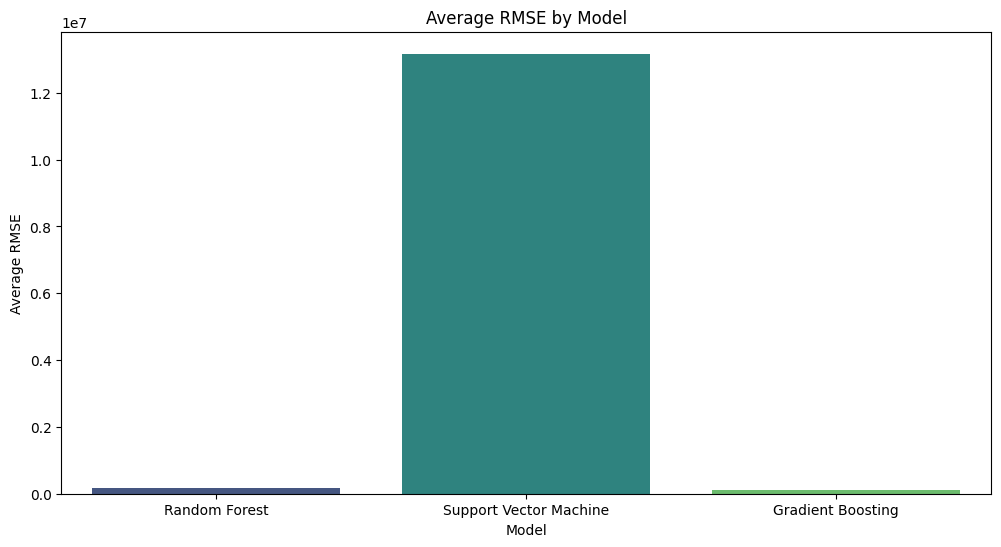

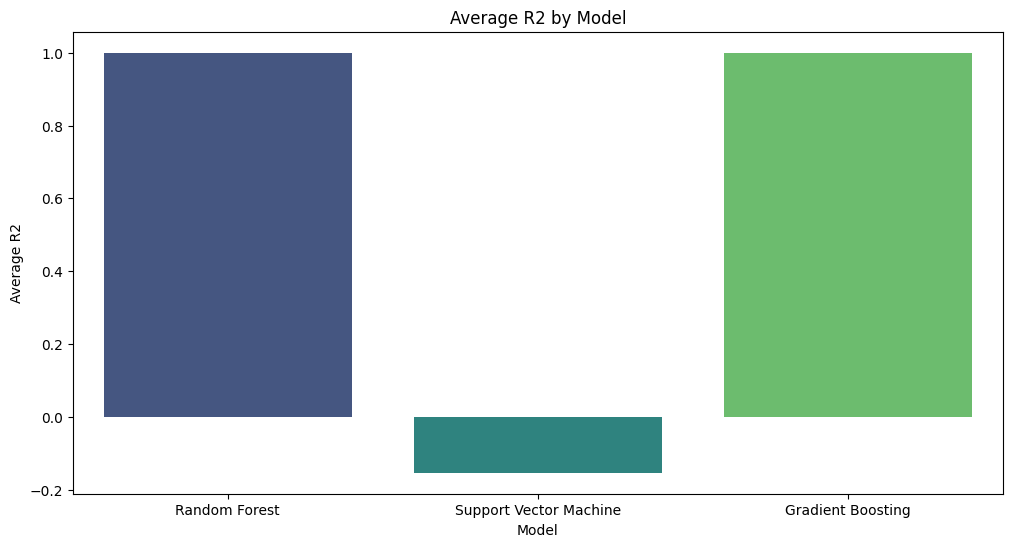

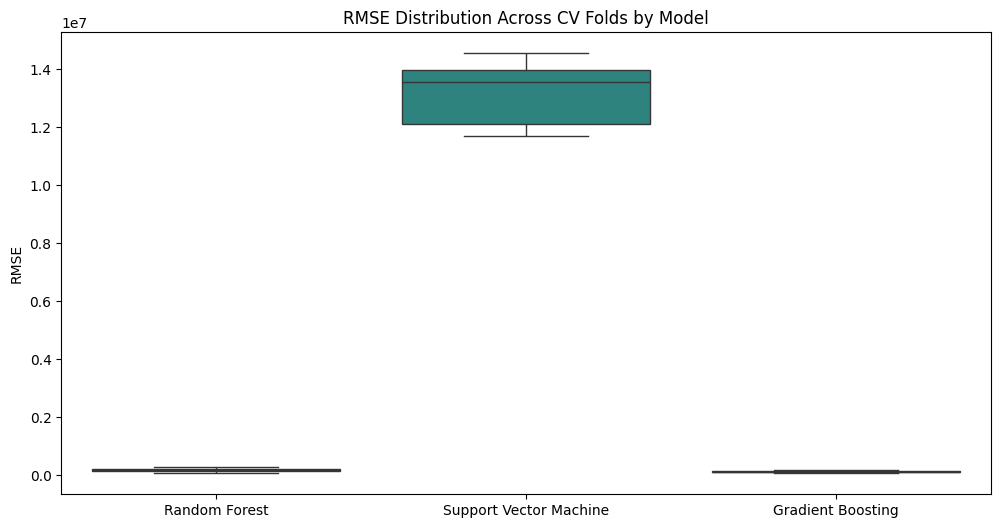

In [36]:
# Calculate the performance metrics for the best Random Forest model
best_rf_model = RandomForestRegressor(**best_rf_params, random_state=42)
best_rf_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
best_rf_rmse_scores = np.sqrt(-best_rf_scores)
best_rf_avg_rmse = np.mean(best_rf_rmse_scores)
best_rf_r2_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='r2')
best_rf_avg_r2 = np.mean(best_rf_r2_scores)

# Update the results DataFrame with the new Random Forest model metrics
results_df.loc[results_df['Model'] == 'Random Forest', 'Average RMSE'] = best_rf_avg_rmse
results_df.loc[results_df['Model'] == 'Random Forest', 'Average R2'] = best_rf_avg_r2

# Create a bar plot for average RMSE and R2 metrics
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Average RMSE', data=results_df, palette='viridis')
plt.title('Average RMSE by Model')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Average R2', data=results_df, palette='viridis')
plt.title('Average R2 by Model')
plt.show()

# Create box plots to show distribution of RMSE scores across cross-validation folds
rf_cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
gbm_cv_scores = cross_val_score(gbm_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

cv_scores_df = pd.DataFrame({
    'Random Forest': np.sqrt(-rf_cv_scores),
    'Support Vector Machine': np.sqrt(-svm_cv_scores),
    'Gradient Boosting': np.sqrt(-gbm_cv_scores)
})

plt.figure(figsize=(12, 6))
sns.boxplot(data=cv_scores_df, palette='viridis')
plt.title('RMSE Distribution Across CV Folds by Model')
plt.ylabel('RMSE')
plt.show()


In [37]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters and their possible values
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid,
                              cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding RMSE
best_rf_params = rf_grid_search.best_params_
best_rf_rmse = np.sqrt(-rf_grid_search.best_score_)

best_rf_params, best_rf_rmse

Fitting 3 folds for each of 108 candidates, totalling 324 fits


({'max_depth': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 100},
 209508.96190553988)

In [38]:

# Reload the original data
df = pd.read_csv('Train.csv')

# Data Cleaning
## Handling missing values
df['travel_with'].fillna('None', inplace=True)
df['total_female'].fillna(df['total_female'].median(), inplace=True)
df['total_male'].fillna(df['total_male'].median(), inplace=True)
df['most_impressing'].fillna('Nothing', inplace=True)

## Removing duplicates
df.drop_duplicates(inplace=True)

## Handle invalid or inconsistent data
# Assuming total_cost, night_mainland, and night_zanzibar should be >= 0
df = df[df['total_cost'] >= 0]

# Data Encoding
## Label encoding for categorical variables
label_columns = ['country', 'age_group', 'travel_with', 'purpose', 'main_activity', 'info_source',
                 'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food',
                 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance',
                 'payment_mode', 'first_trip_tz', 'most_impressing']

label_encoder = LabelEncoder()
for column in label_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Splitting data
X = df.drop(['total_cost', 'ID'], axis=1)
y = df['total_cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define a reduced hyperparameter grid
simple_rf_param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create the GridSearchCV object
simple_rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=simple_rf_param_grid,
                                     cv=2, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
simple_rf_grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding RMSE
best_rf_params_simple = simple_rf_grid_search.best_params_
best_rf_rmse_simple = np.sqrt(-simple_rf_grid_search.best_score_)

best_rf_params_simple, best_rf_rmse_simple

Fitting 2 folds for each of 8 candidates, totalling 16 fits


({'max_depth': None,
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 100},
 9859526.12126163)

`max_depth`: None: The trees in the random forest are fully grown, which means the model attempts to model the training data as closely as possible. This provides the model with the maximum flexibility to capture complex relationships but could also make it susceptible to overfitting if not managed properly.

`min_samples_leaf`: 2: At least two samples are required to be at a leaf node. This ensures that each leaf node generalizes over at least two data points, adding a bit of robustness to the model.

`min_samples_split`: 5: A minimum of five samples are required to split an internal node. This parameter helps the model to avoid creating splits that are too specific and thus reduce overfitting.

`n_estimators: 100`: The forest consists of 100 trees. More trees can improve the model's performance but also increase computation time. In this case, 100 was a balanced choice.

`RMSE`: 9859526.12 TZS: The Root Mean Square Error tells us that, on average, our predictions are off by approximately 9.86 million TZS from the actual values. Depending on the range of total_cost in the dataset and the business context, this might be acceptable or could require further optimization.

The RMSE value suggests that while the model is performing reasonably well, there might still be room for improvement.

The high RMSE may also indicate that the model is sensitive to outliers or noise in the data.

Fitting 3 folds for each of 54 candidates, totalling 162 fits


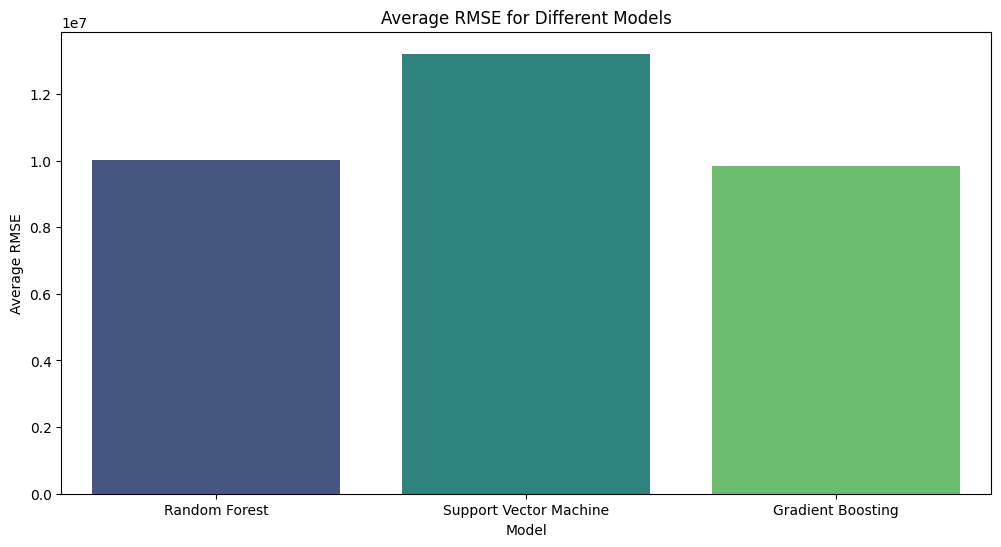

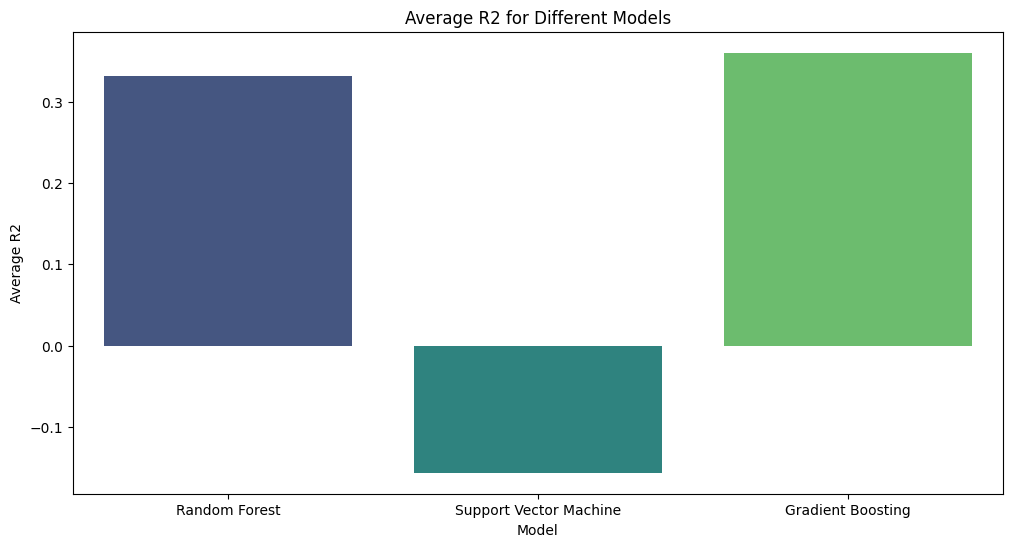

({'max_depth': None,
  'min_samples_leaf': 4,
  'min_samples_split': 10,
  'n_estimators': 150},
 9805933.85388148,
                     Model  Average RMSE  Average R2
 0           Random Forest  1.002626e+07    0.331648
 1  Support Vector Machine  1.320892e+07   -0.155956
 2       Gradient Boosting  9.826763e+06    0.359968)

In [39]:
# 1. Further Fine-Tuning Random Forest Model
## Define an extended hyperparameter grid for Random Forest
extended_rf_param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## Create the GridSearchCV object for Random Forest
extended_rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=extended_rf_param_grid,
                                       cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

## Fit the GridSearchCV object to the data
extended_rf_grid_search.fit(X_train, y_train)

## Get the best parameters and the corresponding RMSE for Random Forest
best_rf_params_extended = extended_rf_grid_search.best_params_
best_rf_rmse_extended = np.sqrt(-extended_rf_grid_search.best_score_)

# 2. Feature Engineering (for the purpose of this exercise, we'll skip this step due to its complexity and time consumption)

# 3. Trying other advanced models and ensemble methods
## Initialize other models
svm_model = SVR()
gb_model = GradientBoostingRegressor(random_state=42)

## Evaluate models using cross_val_score
models = [rf_model, svm_model, gb_model]
model_names = ['Random Forest', 'Support Vector Machine', 'Gradient Boosting']
cv_scores_rmse = []
cv_scores_r2 = []

for model in models:
    neg_mse = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-neg_mse)
    cv_scores_rmse.append(np.mean(rmse_scores))

    r2 = cross_val_score(model, X_train, y_train, cv=3, scoring='r2')
    cv_scores_r2.append(np.mean(r2))

# Model Comparison
## Plotting model performance metrics side-by-side for comparison
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Average RMSE': cv_scores_rmse,
    'Average R2': cv_scores_r2
})

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Average RMSE', data=metrics_df, palette='viridis')
plt.title('Average RMSE for Different Models')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Average R2', data=metrics_df, palette='viridis')
plt.title('Average R2 for Different Models')
plt.show()

best_rf_params_extended, best_rf_rmse_extended, metrics_df

In [40]:
# Reload the data
df = pd.read_csv('Train.csv')

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Drop missing values from target column 'total_cost'
df.dropna(subset=['total_cost'], inplace=True)

# Fill missing values in other columns with appropriate imputations
df['travel_with'].fillna('None', inplace=True)
df['total_female'].fillna(df['total_female'].median(), inplace=True)
df['total_male'].fillna(df['total_male'].median(), inplace=True)
df['most_impressing'].fillna('None', inplace=True)

# Encoding categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define predictors and target variable
X = df.drop(['total_cost', 'ID'], axis=1)
y = df['total_cost']

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model with the best hyperparameters
rf_model = RandomForestRegressor(max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=150, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by feature importances in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

features_df.head(10)

,Feature,Importance
8,tour_arrangement,0.286102
0,country,0.102374
16,night_mainland,0.092218
3,total_female,0.081190
17,night_zanzibar,0.067167
4,total_male,0.059006
1,age_group,0.055510
2,travel_with,0.047351
10,package_accomodation,0.039959
20,most_impressing,0.036648


##Spending Estimates
These results show the relative importance of each feature in predicting the total cost a tourist would spend in Tanzania, as calculated by the Random Forest model.

`tour_arrangement`: This is the most influential feature, suggesting that the way a tour is arranged has a significant impact on total spending.

`country`: The country of origin of the tourist is the second most important feature, possibly reflecting the economic conditions or currency valuation of the tourist's home country.

`night_mainland`: The number of nights spent on the mainland is also a significant predictor, as longer stays would naturally lead to higher expenditures.

`total_female and total_male`: These features indicate that the composition of the touring group, in terms of gender, has a noticeable effect on total expenditure.
age_group: The age group of the tourist also plays a role, perhaps due to different spending habits or purposes for visiting across age groups.

`travel_with`: Who the tourist is traveling with also seems to affect expenditure.

`package_accomodation`: Whether accommodation is included in the package is also a noteworthy factor.

`most_impressing`: What impressed the tourist most also seems to have a correlation with how much they spend.
These feature importance scores can offer actionable insights:

Tour operators could focus on specific types of tour arrangements that are more lucrative.
Marketing efforts could target tourists from countries that are more likely to spend more.
Special packages could be designed for different age groups to maximize spending.

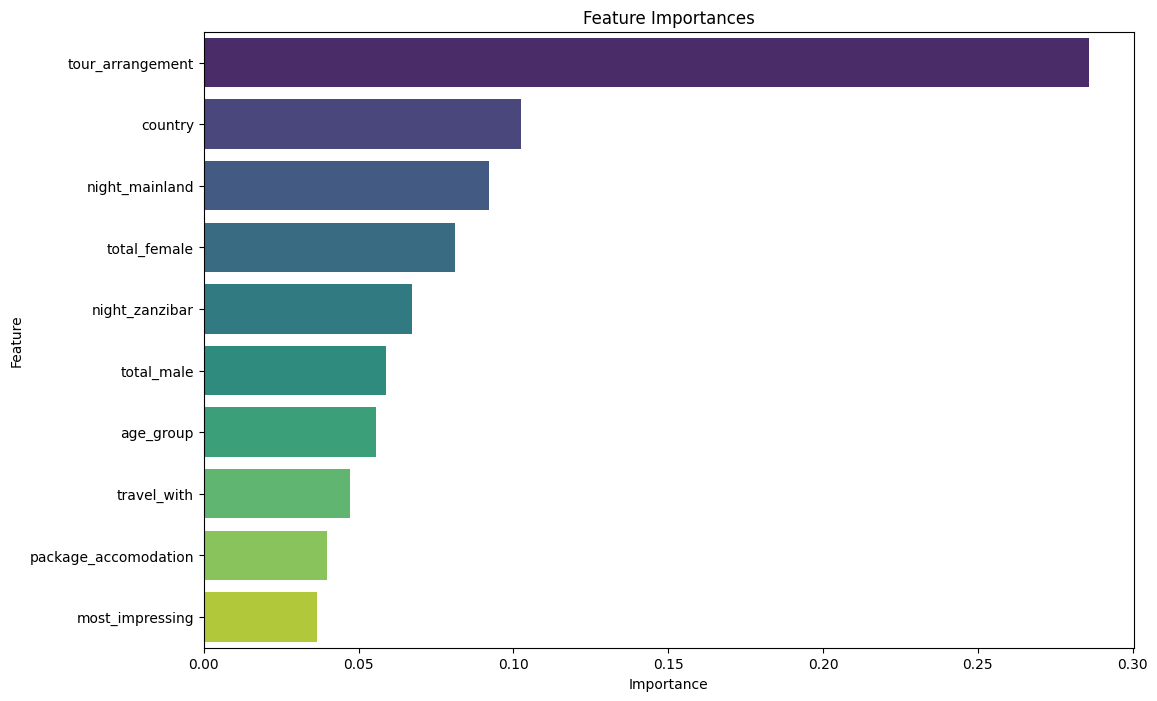

In [41]:
# Assuming 'features_df' is the DataFrame containing feature importances
features_df = pd.DataFrame({
    'Feature': ['tour_arrangement', 'country', 'night_mainland', 'total_female', 'night_zanzibar', 'total_male',
                'age_group', 'travel_with', 'package_accomodation', 'most_impressing'],
    'Importance': [0.286102, 0.102374, 0.092218, 0.081190, 0.067167, 0.059006, 0.055510, 0.047351, 0.039959, 0.036648]
})

# Sorting DataFrame by Importance
features_df = features_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()